In [5]:
import geopandas as gp
%matplotlib inline

In [3]:
edd = gp.read_file('E:/Transit-Casa-Alex/Input/EDD/EDD_SF_JOBS_2009-2015/SF_JOBS_2009-2015/SF_JOBS_2009_Q4.shp')

KeyboardInterrupt: 

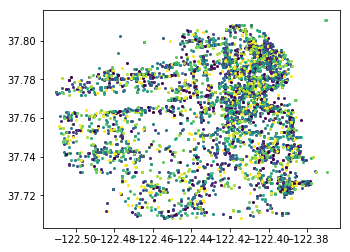

In [7]:
edd.plot()

In [6]:
edd.head()

,Landuse,NAICS,Q4AVG,geometry,latitude,longitude,month1empl,month2empl,month3empl,quarter,year
0,PDR,491110,8,POINT (-122.40005 37.794474),37.794474,-122.400050,8,8,8,4,2009
1,PDR,491110,6,POINT (-122.415716 37.78178),37.781780,-122.415716,6,6,5,4,2009
2,PDR,491110,6,POINT (-122.4166 37.754113),37.754113,-122.416600,7,6,6,4,2009
3,PDR,491110,125,POINT (-122.476051 37.752254),37.752254,-122.476051,133,122,120,4,2009
4,PDR,491110,2213,POINT (-122.38219 37.739735),37.739735,-122.382190,2352,2220,2068,4,2009


In [8]:
edd.year.unique()

array([2009], dtype=int64)

In [9]:
buffer = gp.read_file('E:/Transit-Casa-Alex/Output/Buffers/Tenth/Buffers_Tenth_GCS.shp')

In [14]:
edd = edd.to_crs(buffer.crs)

In [15]:
joined = gp.sjoin(buffer,edd[['geometry','Q4AVG']],how = 'left')

In [16]:
joined.head()

,STOP_ID,STOP_LAT,STOP_LON,geometry,index_right,Q4AVG
0,390,37.72119,-122.475096,POLYGON ((-122.4732708739641 37.72122058726108...,17620.0,4.0
0,390,37.72119,-122.475096,POLYGON ((-122.4732708739641 37.72122058726108...,20508.0,39.0
0,390,37.72119,-122.475096,POLYGON ((-122.4732708739641 37.72122058726108...,18400.0,3.0
0,390,37.72119,-122.475096,POLYGON ((-122.4732708739641 37.72122058726108...,34633.0,1.0
0,390,37.72119,-122.475096,POLYGON ((-122.4732708739641 37.72122058726108...,10493.0,30.0


In [17]:
joined_sum = joined[['geometry','STOP_ID','Q4AVG']].groupby(by = 'STOP_ID').agg({'geometry':'first','Q4AVG':'sum'})

,geometry,Q4AVG
STOP_ID,,
390,POLYGON ((-122.4732708739641 37.72122058726108...,4276.0
392,"POLYGON ((-122.475383794672 37.7651896197756, ...",32.0
660,POLYGON ((-122.4335617909149 37.72394397209937...,270.0
913,POLYGON ((-122.4239769029978 37.71922182363711...,8.0
3001,"POLYGON ((-122.3942171872453 37.7885593622781,...",6419.0
3003,POLYGON ((-122.3901183504868 37.78185629881549...,1790.0
3004,POLYGON ((-122.3904053499359 37.78188330326137...,1962.0
3005,POLYGON ((-122.3919513152055 37.78332032720333...,2308.0
3006,POLYGON ((-122.3916423260522 37.78287432241891...,2493.0


In [ ]:
len(joined)